In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plot
from pandas import DataFrame, Series

In [2]:
# read from csv files

datapath=pl.Path("../csvdata")

file_list=[]
dfs=[]
for x in datapath.glob("*H.csv"):
    print("Reading "+x.name)
    f=pd.read_csv(x,index_col=0,na_values=" ")
    dfs.append(f)
    file_list.append(x.name)

Reading 110kVChangLiu1-H.csv
Reading 110kVChangLiu3-H.csv
Reading 35kVJiangChuan4-H.csv
Reading 110kVChangLiu4-H.csv
Reading 110kVJiangChuan3-H.csv
Reading 110kVJiangChuan2-H.csv
Reading 10kVWanKe2-H.csv
Reading 110kVChangLiu2-H.csv
Reading 110kVJiangChuan1-H.csv
Reading 35kVJiangChuan5-H.csv
Reading 10kVQinZhou4-H.csv
Reading 10kVQinZhou3-H.csv
Reading 35kVKunYang1-H.csv
Reading 10kVWanKe1-H.csv
Reading 10kVKunYang3-H.csv


In [3]:
f.columns

Index([' KunYang3 - Min[Va H1] (V)', ' KunYang3 - Avg[Va H1] (V)',
       ' KunYang3 - Max[Va H1] (V)', ' KunYang3 - Min[Vb H1] (V)',
       ' KunYang3 - Avg[Vb H1] (V)', ' KunYang3 - Max[Vb H1] (V)',
       ' KunYang3 - Min[Vc H1] (V)', ' KunYang3 - Avg[Vc H1] (V)',
       ' KunYang3 - Max[Vc H1] (V)', ' KunYang3 - Min[Ia H1] (A)',
       ...
       ' KunYang3 - Max[Vc H25] (V)', ' KunYang3 - Min[Ia H25] (A)',
       ' KunYang3 - Avg[Ia H25] (A)', ' KunYang3 - Max[Ia H25] (A)',
       ' KunYang3 - Min[Ib H25] (A)', ' KunYang3 - Avg[Ib H25] (A)',
       ' KunYang3 - Max[Ib H25] (A)', ' KunYang3 - Min[Ic H25] (A)',
       ' KunYang3 - Avg[Ic H25] (A)', ' KunYang3 - Max[Ic H25] (A)'],
      dtype='object', length=450)

In [4]:
tr_data=DataFrame()
i=0
for df in dfs:
    for c in df.columns:
        if c.find("Avg[Ia H3]")!=-1:
            print (c)
            tr_data[c]=df[c]
            i+=1
print(i)

 Changliu1 - Avg[Ia H3] (A)
 Changliu3 - Avg[Ia H3] (A)
 JiangChuan4 - Avg[Ia H3] (A)
 JiangChuan3 - Avg[Ia H3] (A)
 JiangChuan2 - Avg[Ia H3] (A)
 WanKe2 - Avg[Ia H3] (A)
 Changliu2 - Avg[Ia H3] (A)
 JiangChuan1 - Avg[Ia H3] (A)
 JiangChuan5 - Avg[Ia H3] (A)
 QinZhou4 - Avg[Ia H3] (A)
 QinZhou3 - Avg[Ia H3] (A)
 KunYang1 - Avg[Ia H3] (A)
 WanKe1 - Avg[Ia H3] (A)
 KunYang3 - Avg[Ia H3] (A)
14


In [5]:
train_data=tr_data.dropna()

In [6]:
len(train_data)

3299

In [7]:
train_data=train_data.dropna(axis=1)

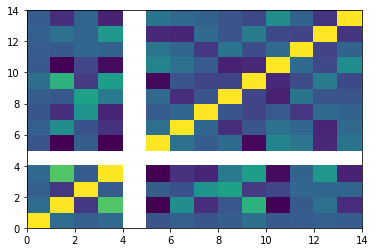

In [8]:
corMat=DataFrame(train_data.corr())
plot.pcolor(corMat)
plot.show()

In [11]:
train_data.describe()

,Changliu1 - Avg[Ia H3] (A),Changliu3 - Avg[Ia H3] (A),JiangChuan4 - Avg[Ia H3] (A),JiangChuan3 - Avg[Ia H3] (A),JiangChuan2 - Avg[Ia H3] (A),WanKe2 - Avg[Ia H3] (A),Changliu2 - Avg[Ia H3] (A),JiangChuan1 - Avg[Ia H3] (A),JiangChuan5 - Avg[Ia H3] (A),QinZhou4 - Avg[Ia H3] (A),QinZhou3 - Avg[Ia H3] (A),KunYang1 - Avg[Ia H3] (A),WanKe1 - Avg[Ia H3] (A),KunYang3 - Avg[Ia H3] (A)
count,3299.000000,3299.000000,3299.000000,3299.000000,3299.0,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000
mean,0.000047,0.098868,0.493906,0.265251,0.0,0.549845,0.088230,0.175018,0.251435,0.222846,0.115702,0.579732,0.386105,0.027739
std,0.000115,0.049204,0.153159,0.154577,0.0,0.250207,0.021590,0.087789,0.064931,0.083795,0.051903,0.191213,0.171850,0.023569
min,0.000000,0.034683,0.169795,0.030870,0.0,0.108112,0.031992,0.040382,0.072410,0.048586,0.013841,0.136640,0.072233,0.007732
25%,0.000000,0.062020,0.403046,0.151658,0.0,0.361780,0.071797,0.104038,0.204763,0.160724,0.074979,0.439206,0.253594,0.014094
50%,0.000000,0.081663,0.473134,0.219500,0.0,0.515998,0.089274,0.157185,0.245178,0.207827,0.112044,0.557325,0.362092,0.028264
75%,0.000000,0.124927,0.562350,0.380572,0.0,0.693293,0.104350,0.216162,0.295573,0.276727,0.151541,0.707487,0.503018,0.037078
max,0.001168,0.318657,1.067509,1.545800,0.0,1.564409,0.137524,0.497185,0.480069,0.623121,0.359928,1.611854,1.009670,0.342903


In [12]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(train_data,test_size=0.2,random_state=0)

In [13]:
MAX= train.max()
MIN = train.min()

In [14]:
train_s=(train-MIN)/(MAX-MIN)
test_s=(test-MIN)/(MAX-MIN)

In [15]:
train_s=train_s.fillna(0)
test_s=test_s.fillna(0)

In [16]:
#  generate X_train,Y_train,X_test,Y_test for all target features
X_train=train_s.copy();Y_train=DataFrame()

for c in train_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_train[c]=train_s[c]
        X_train=X_train.drop(c,axis=1)

        
X_test=test_s.copy();Y_test=DataFrame()

for c in test_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_test[c]=test_s[c]
        X_test=X_test.drop(c,axis=1)

In [17]:
###### network from keras for SHDKY data simulation ###########
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import keras


model = Sequential()

model.add(Dense(28, input_dim=13,kernel_initializer="normal"))
model.add(Activation('relu'))
model.add(Dense(7, activation='relu',kernel_initializer="normal"))
model.add(Dense(1, activation='linear',kernel_initializer="normal"))

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.02))

In [64]:
model.fit(X_train, Y_train, epochs=300,batch_size=30,
          shuffle=True,verbose=2,validation_split=0.2) 

Train on 2111 samples, validate on 528 samples
Epoch 1/300
 - 0s - loss: 0.0107 - val_loss: 0.0156
Epoch 2/300
 - 0s - loss: 0.0106 - val_loss: 0.0151
Epoch 3/300
 - 0s - loss: 0.0107 - val_loss: 0.0157
Epoch 4/300
 - 0s - loss: 0.0108 - val_loss: 0.0156
Epoch 5/300
 - 0s - loss: 0.0109 - val_loss: 0.0165
Epoch 6/300
 - 0s - loss: 0.0107 - val_loss: 0.0162
Epoch 7/300
 - 0s - loss: 0.0109 - val_loss: 0.0154
Epoch 8/300
 - 0s - loss: 0.0108 - val_loss: 0.0152
Epoch 9/300
 - 0s - loss: 0.0106 - val_loss: 0.0216
Epoch 10/300
 - 0s - loss: 0.0109 - val_loss: 0.0162
Epoch 11/300
 - 0s - loss: 0.0107 - val_loss: 0.0160
Epoch 12/300
 - 0s - loss: 0.0107 - val_loss: 0.0178
Epoch 13/300
 - 0s - loss: 0.0107 - val_loss: 0.0173
Epoch 14/300
 - 0s - loss: 0.0109 - val_loss: 0.0161
Epoch 15/300
 - 0s - loss: 0.0108 - val_loss: 0.0162
Epoch 16/300
 - 0s - loss: 0.0107 - val_loss: 0.0159
Epoch 17/300
 - 0s - loss: 0.0107 - val_loss: 0.0155
Epoch 18/300
 - 0s - loss: 0.0108 - val_loss: 0.0151
Epoch 19

In [28]:
((model.predict(X_test)-Y_test)/Y_test)

,WanKe1 - Avg[Ia H3] (A)
时间,
2018-02-02 05:24:00,-0.126370
2018-02-01 01:42:00,0.183036
2018-02-02 20:36:00,-0.257717
2018-02-07 13:15:00,0.432866
2018-02-03 09:27:00,0.236788
2018-02-05 09:48:00,0.581171
2018-02-06 10:06:00,-0.382158
2018-02-02 05:06:00,-0.100319
2018-02-02 10:24:00,2.603543


In [65]:
c=Y_test.columns
R= pd.DataFrame(model.predict(X_test),columns=['V_pred'])
R.index = Y_test.index
R= R.join(Y_test)
R=  R*(MAX[c]-MIN[c]).values[0]+MIN[c].values[0]


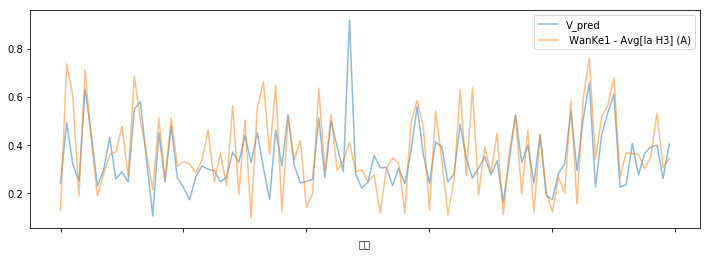

In [66]:
R_show=R.iloc[200:300,:]

import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

R_show.plot(alpha =0.5,figsize = (12,4))

In [67]:
R["diff"]=(R["V_pred"]-R[c[0]])
R["diff_ptg"]=(R["V_pred"]-R[c[0]])/R[c[0]]

In [68]:
R.describe()

,V_pred,WanKe1 - Avg[Ia H3] (A),diff,diff_ptg
count,660.000000,660.000000,660.000000,660.000000
mean,0.350687,0.379699,-0.029012,0.038932
std,0.126039,0.176747,0.118500,0.404505
min,0.046197,0.080111,-0.486715,-0.684776
25%,0.261966,0.242354,-0.103000,-0.232902
50%,0.324237,0.351232,-0.024688,-0.064326
75%,0.419405,0.501342,0.057763,0.204721
max,0.919917,0.968567,0.506540,2.350421


In [69]:
R[:6]

,V_pred,WanKe1 - Avg[Ia H3] (A),diff,diff_ptg
时间,,,,
2018-02-02 05:24:00,0.655104,0.755342,-0.100238,-0.132706
2018-02-01 01:42:00,0.361007,0.329155,0.031852,0.096769
2018-02-02 20:36:00,0.420784,0.483257,-0.062473,-0.129275
2018-02-07 13:15:00,0.143194,0.186829,-0.043635,-0.233554
2018-02-03 09:27:00,0.308505,0.268077,0.040428,0.150808
2018-02-05 09:48:00,0.368083,0.267917,0.100166,0.373870


In [70]:
R.corr()

,V_pred,WanKe1 - Avg[Ia H3] (A),diff,diff_ptg
V_pred,1.000000,0.742539,-0.043901,-0.044217
WanKe1 - Avg[Ia H3] (A),0.742539,1.000000,-0.701756,-0.613488
diff,-0.043901,-0.701756,1.000000,0.868010
diff_ptg,-0.044217,-0.613488,0.868010,1.000000


In [71]:
train_data.corr()[c[0]].sort_values()

 Changliu2 - Avg[Ia H3] (A)     -0.282127
 WanKe2 - Avg[Ia H3] (A)        -0.267820
 KunYang3 - Avg[Ia H3] (A)      -0.207660
 KunYang1 - Avg[Ia H3] (A)      -0.142498
 QinZhou3 - Avg[Ia H3] (A)      -0.118576
 JiangChuan5 - Avg[Ia H3] (A)   -0.050516
 Changliu1 - Avg[Ia H3] (A)      0.004514
 JiangChuan4 - Avg[Ia H3] (A)    0.031477
 JiangChuan1 - Avg[Ia H3] (A)    0.061140
 Changliu3 - Avg[Ia H3] (A)      0.100691
 QinZhou4 - Avg[Ia H3] (A)       0.166997
 JiangChuan3 - Avg[Ia H3] (A)    0.328922
 WanKe1 - Avg[Ia H3] (A)         1.000000
 JiangChuan2 - Avg[Ia H3] (A)         NaN
Name:  WanKe1 - Avg[Ia H3] (A), dtype: float64

In [72]:
model.save("model_h5/M_HI3.h5")

In [73]:
test[c][:6]

,WanKe1 - Avg[Ia H3] (A)
时间,
2018-02-02 05:24:00,0.755342
2018-02-01 01:42:00,0.329155
2018-02-02 20:36:00,0.483257
2018-02-07 13:15:00,0.186829
2018-02-03 09:27:00,0.268077
2018-02-05 09:48:00,0.267917


In [74]:
R[c][:6]

,WanKe1 - Avg[Ia H3] (A)
时间,
2018-02-02 05:24:00,0.755342
2018-02-01 01:42:00,0.329155
2018-02-02 20:36:00,0.483257
2018-02-07 13:15:00,0.186829
2018-02-03 09:27:00,0.268077
2018-02-05 09:48:00,0.267917


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc134686978>]],
      dtype=object)

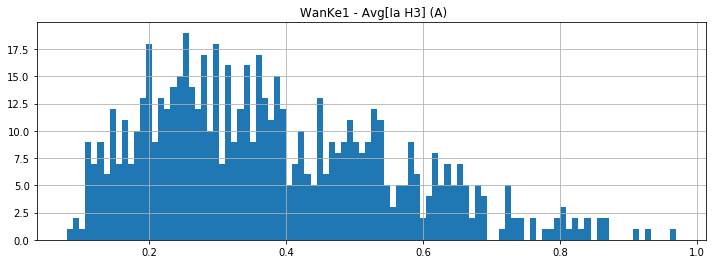

In [75]:
R[c].hist(bins=100)

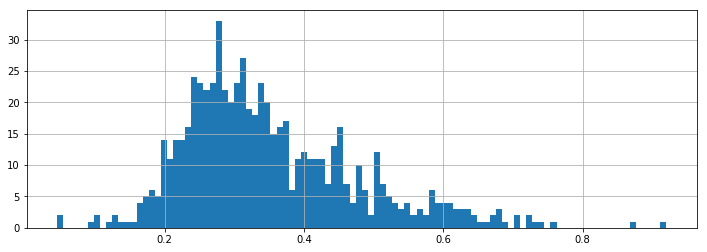

In [76]:
R['V_pred'].hist(bins=100)

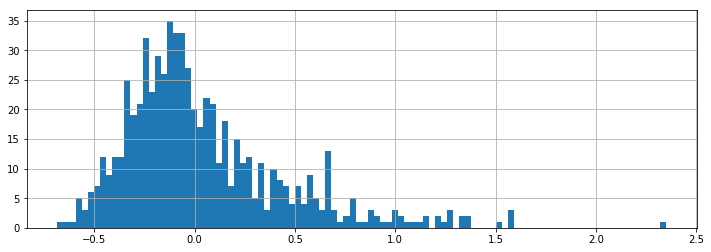

In [77]:
R.diff_ptg.hist(bins=100)